In [1]:
import time
import os
import os.path as op

import numpy as np
import pandas as pd
import glob
import pickle

import scipy as sp
from scipy import stats
import scipy.optimize as so

import seaborn as sns
import matplotlib.pyplot as plt

#from idealObserver2 import io_with_derivations 

"""
Created on: Sept 11, 2023
Latest update: Dec 7, 2023
Author: @zoeheez



Description: 

This script is a draft for testing different processing and analysis pipline for pupil data.

"""

'\nCreated on: Sept 11, 2023\nLatest update: Dec 7, 2023\nAuthor: @zoeheez\n\n\n\nDescription: \n\nThis script is a draft for testing different processing and analysis pipline for pupil data.\n\n'

In [5]:
# import all pkl files 

# get the project directory (cbandit)
proj_dir = os.path.normpath(os.getcwd()) #+ os.sep + os.pardir)
print(f'project directory: {proj_dir}')

f_data_all = open(proj_dir+"/joint_data_all_new2.pkl","rb")
joint_data_by_session = pickle.load(f_data_all)

f_data_by_sub = open(proj_dir+"/joint_data_by_sub.pkl","rb")
joint_data_by_sub = pickle.load(f_data_by_sub)

data_ff = pd.read_pickle('outputs_ff.p')

# define global values

# number of sessions per subject
nsess = 8 

# the valid subjects (delete invalid subjects)
valid_sub_temp = np.array(data_ff['subnums'])[:-2]
print(valid_sub_temp)
print(len(valid_sub_temp))
valid_sub_temp = np.delete(valid_sub_temp, np.where(valid_sub_temp == 35)[0][0])
#valid_sub_new = np.delete(valid_sub_temp, [17,18]) # delete sub 24, 25
#valid_sub_new_new = np.delete(valid_sub_new, 23)

valid_sub = valid_sub_temp #valid_sub_new_new
print('number of valid subjects: ', len(valid_sub))
print('valid subjects: ', valid_sub)


project directory: /Users/zoehe/Documents/GitHub/cbandit_23
[ 1  2  3  4  6  8 10 11 12 13 14 16 19 20 21 22 23 24 25 26 27 28 29 30
 31 32 33 34 35 36 37 38 39 40 41 43 44 45 47 48 49 50 51 52 53 54 55 56
 57 58 59 60]
52
number of valid subjects:  51
valid subjects:  [ 1  2  3  4  6  8 10 11 12 13 14 16 19 20 21 22 23 24 25 26 27 28 29 30
 31 32 33 34 36 37 38 39 40 41 43 44 45 47 48 49 50 51 52 53 54 55 56 57
 58 59 60]


In [6]:
joint_data_by_sub['sub1'].columns

Index(['level_0', 'index', 'trial', 'rt', 'pupil_baseline_start',
       'pupil_baseline_outcome', 'pupil_size_pre_response',
       'pupil_size_avg_pre_response', 'pupil_size_response',
       'pupil_size_avg_response', 'pupil_size_outcome',
       'pupil_size_avg_outcome', 'pupil_baseline_start_avg',
       'pupil_baseline_outcome_avg', 'pupil_change_pre_response',
       'pupil_change_avg_pre_response', 'pupil_change_response',
       'pupil_change_avg_response', 'pupil_change_outcome',
       'pupil_change_avg_outcome', 'pupil_change_avg_outcome1',
       'pupil_change_avg_outcome2', 'pupil_change_avg_outcome_nassar',
       'pupil_change_avg_outcome3', 'pupil_change_avg_response_nassar',
       'pupil_change_avg_response3', 'rt_next', 'trial', 'choices',
       'choices_new', 'outcomes', 'mean_A', 'mean_B', 'mean_chosen',
       'mean_unchosen', 'forced', 'free', 'valid', 'SD', 'changepoints',
       'trial', 'RPE', 'ER_chosen_before', 'ER_chosen_after',
       'EU_chosen_before',

In [165]:
data_session
    

,index,trial,rt,pupil_baseline_start,pupil_baseline_outcome,pupil_size_pre_response,pupil_size_avg_pre_response,pupil_size_response,pupil_size_avg_response,pupil_size_outcome,...,ER_diff_after,EU_diff_before,EU_diff_after,UU_diff_before,UU_diff_after,switch,switch_next,outcome_change,trial_after_forced,trial_after_cp
0,0,0,0.633,"[1.298345034980442, 1.349344825884218, 1.37612...","[0.5874169365334514, 0.6176203091908042, 0.619...","[0.8794234921058298, 0.8949595547442151, 0.919...",0.892469,"[0.8502220601274781, 0.8317130106153972, 0.803...",0.720894,"[0.5874169365334514, 0.6176203091908042, 0.619...",...,-6.515526,0.000000,-0.298704,0.000000,0.000000,False,True,43.0,0,0
1,1,1,0.577,"[-0.3452433437289259, -0.415636437725473, -0.4...","[-0.5860149610300334, -0.5562942978792021, -0....","[-0.22828786551765826, -0.19629593023158265, -...",-0.085974,"[-0.032700875142832396, 0.0022158299849909862,...",-0.225935,"[-0.5860149610300334, -0.5562942978792021, -0....",...,19.576334,0.298704,-0.166363,0.000000,0.000000,True,True,22.0,0,0
2,2,2,0.700,"[-0.2541734874809837, -0.28710339590111134, -0...","[-0.38109881044335775, -0.3822331787285142, -0...","[-0.06953011741788251, -0.0711898002825245, -0...",-0.117194,"[-0.13986485818744734, -0.14299600389698947, -...",-0.568872,"[-0.38109881044335775, -0.3822331787285142, -0...",...,-14.886019,0.166363,-0.154756,0.000000,-0.130644,True,True,-20.0,0,0
3,3,3,0.511,"[0.06846787175262459, 0.08171764701346723, 0.1...","[-0.6930707523005025, -0.7139195793603291, -0....","[0.10012731958175446, 0.08886432078982155, 0.0...",0.118849,"[0.11944813089068734, 0.14628069477715142, 0.1...",-0.245054,"[-0.6930707523005025, -0.7139195793603291, -0....",...,19.023073,0.154756,-0.122778,0.130644,-0.095401,True,True,19.0,0,0
4,4,4,0.641,"[-0.9728394589436898, -1.0144269761045233, -1....","[-0.8359700509332515, -0.827999930016883, -0.8...","[-1.4055192947270836, -1.3672931190175288, -1....",-1.341521,"[-1.249082669552613, -1.2625046290970643, -1.3...",-0.761903,"[-0.8359700509332515, -0.827999930016883, -0.8...",...,-13.986020,0.122778,-0.192348,0.095401,-0.106581,True,False,-17.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,91,91,0.362,"[-0.2997472665246721, -0.39411448656262715, -0...","[-0.5087911117818227, -0.5597956670287835, -0....","[-0.38287161119409535, -0.3585672800439359, -0...",-0.465038,"[-0.4503501807718926, -0.4409565282298439, -0....",-0.066393,"[-0.5087911117818227, -0.5597956670287835, -0....",...,8.295652,0.309494,0.325698,0.187096,0.231912,True,False,27.0,4,66
92,92,92,0.393,"[-0.36906827704933304, -0.3227936556347721, -0...","[-0.42779384057730696, -0.4311285157056157, -0...","[-0.1900547743323963, -0.18003531516154653, -0...",-0.127069,"[-0.12045483405457696, -0.0802919524682638, -0...",-0.196837,"[-0.42779384057730696, -0.4311285157056157, -0...",...,-6.952608,0.325698,-0.213283,0.231912,0.110807,False,True,-29.0,5,67
93,93,93,0.553,"[0.8184181219148844, 0.8460899632559404, 0.874...","[-0.5385146880661842, -0.5193869589790654, -0....","[1.27310168316022, 1.3301149314003762, 1.36691...",1.532975,"[1.7553762901957797, 1.7479141549977746, 1.686...",0.753107,"[-0.5385146880661842, -0.5193869589790654, -0....",...,5.326012,0.213283,0.206578,-0.110807,0.053891,True,False,47.0,6,68
94,94,94,0.404,"[-0.34390815716973316, -0.33328536542321385, -...","[0.5210962490915485, 0.5580357953794147, 0.563...","[-0.2238805806157133, -0.2286027563430503, -0....",-0.127487,"[-0.14378113677766172, -0.08440663894615112, -...",0.274639,"[0.5210962490915485, 0.5580357953794147, 0.563...",...,13.639762,0.206578,0.210557,0.053891,0.127360,False,False,18.0,7,69


In [139]:
data_session = joint_data_by_session['sub1']['sess7']

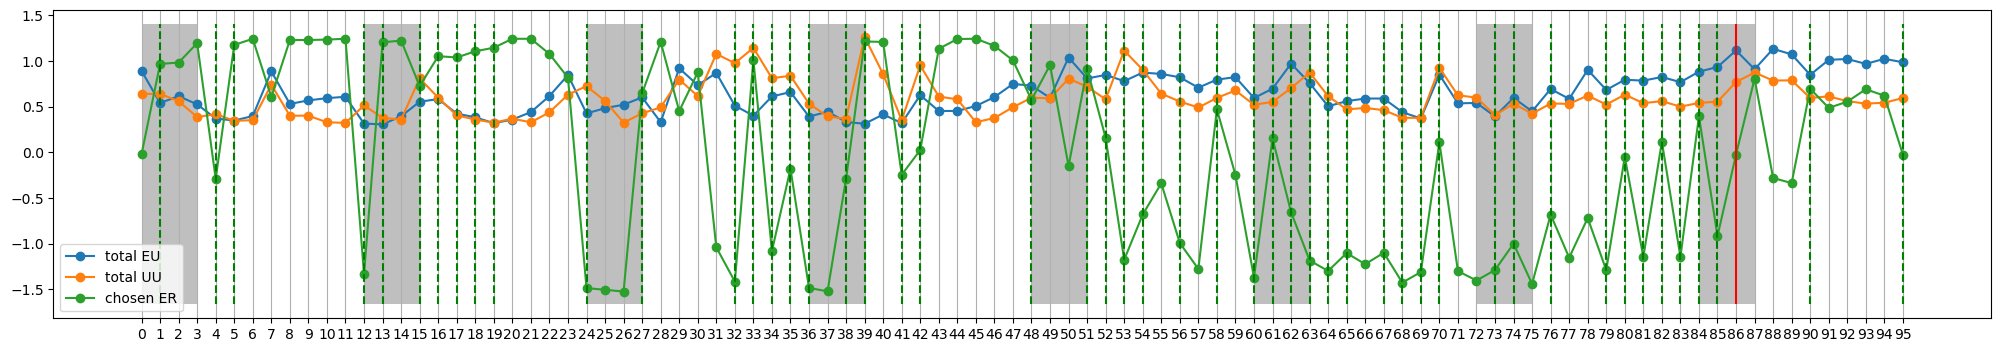

In [140]:
gridsize = (1,1)
fig = plt.figure(figsize=(25, 4))
ax = plt.subplot2grid(gridsize, (0, 0))
#ax.set_xlim([0, 95])

plt.xticks(data_session['index'])
ax.xaxis.grid() # vertical lines

#plt.plot(data_session['pupil_size_avg_outcome'])
#ax.plot(data_session['index'], data_session['pupil_size_avg_outcome'], '-o')
ax.plot(data_session['index'], data_session['EU_sum_after'], '-o', label='total EU')
ax.plot(data_session['index'], data_session['UU_sum_after'], '-o', label='total UU')
ax.plot(data_session['index'], (data_session['ER_chosen_after']-np.mean(data_session['ER_chosen_after']))/np.std(data_session['ER_chosen_after']), '-o', label='chosen ER')

#ax.plot(data_session['index'], data_session['EU_diff_after'], '-o', label='diff EU')

#ax.scatter(data_session['index'], data_session['pupil_size_avg_outcome'])


#ax.plot(data_session['index'], (data_session['RPE']) /np.std(data_session['RPE']), '-o')
#ax.scatter(data_session['index'], (data_session['RPE']) /np.std(data_session['RPE']))

ymin, ymax = ax.get_ylim()
ax.fill_between(data_session['index'],ymin, ymax, where = data_session['forced'], facecolor='grey',alpha=0.5)
cps = data_session[data_session['changepoints'] == 1]['index']
ax.vlines(cps, ymin, ymax, color='red', linestyles='solid')

switches = data_session[data_session['switch'] == 1]['index']
ax.vlines(switches, ymin, ymax, color='green', linestyles='dashed')


plt.legend()

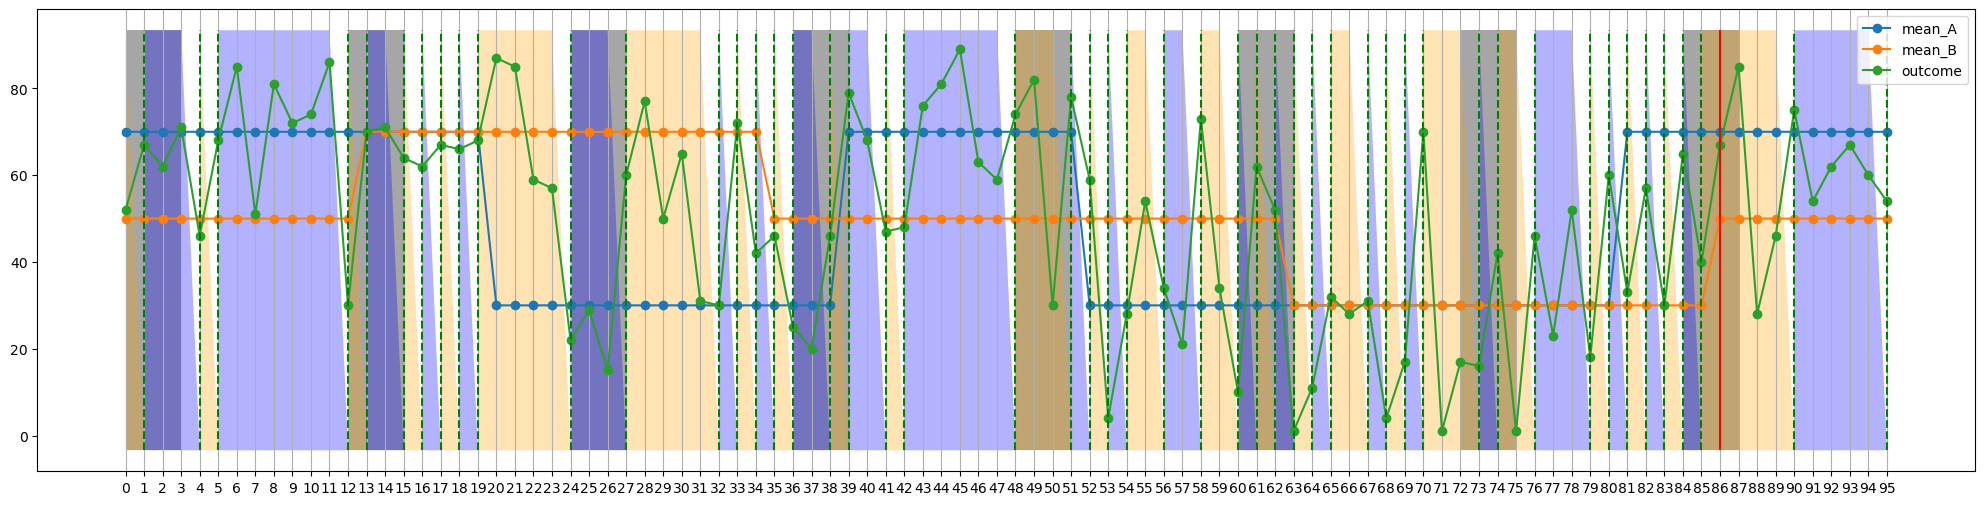

In [141]:
gridsize = (1,1)
fig = plt.figure(figsize=(25, 6))
ax = plt.subplot2grid(gridsize, (0, 0))
#ax.set_xlim([0, 95])

plt.xticks(data_session['index'])
ax.xaxis.grid() # vertical lines

#plt.plot(data_session['pupil_size_avg_outcome'])
#ax.plot(data_session['index'], data_session['pupil_size_avg_outcome'], '-o')
ax.plot(data_session['index'], data_session['mean_A'], '-o', label='mean_A')
ax.plot(data_session['index'], data_session['mean_B'], '-o', label='mean_B')
ax.plot(data_session['index'], data_session['outcomes'], '-o', label='outcome')

#ax.plot(data_session['index'], (data_session['ER_chosen_after']-np.mean(data_session['ER_chosen_after']))/np.std(data_session['ER_chosen_after']), '-o', label='chosen ER')

#ax.plot(data_session['index'], data_session['EU_diff_after'], '-o', label='diff EU')

#ax.scatter(data_session['index'], data_session['pupil_size_avg_outcome'])


#ax.plot(data_session['index'], (data_session['RPE']) /np.std(data_session['RPE']), '-o')
#ax.scatter(data_session['index'], (data_session['RPE']) /np.std(data_session['RPE']))

ymin, ymax = ax.get_ylim()
ax.fill_between(data_session['index'],ymin, ymax, where = (data_session['forced']),facecolor='gray',alpha=0.7)

ax.fill_between(data_session['index'],ymin, ymax, where = (data_session['choices_new']==1), interpolate=True,facecolor='orange',alpha=0.3)
ax.fill_between(data_session['index'],ymin, ymax, where = (data_session['choices_new']==0),interpolate=True,facecolor='blue',alpha=0.3)

cps = data_session[data_session['changepoints'] == 1]['index']
ax.vlines(cps, ymin, ymax, color='red', linestyles='solid')

switches = data_session[data_session['switch'] == 1]['index']
ax.vlines(switches, ymin, ymax, color='green', linestyles='dashed')




plt.legend()

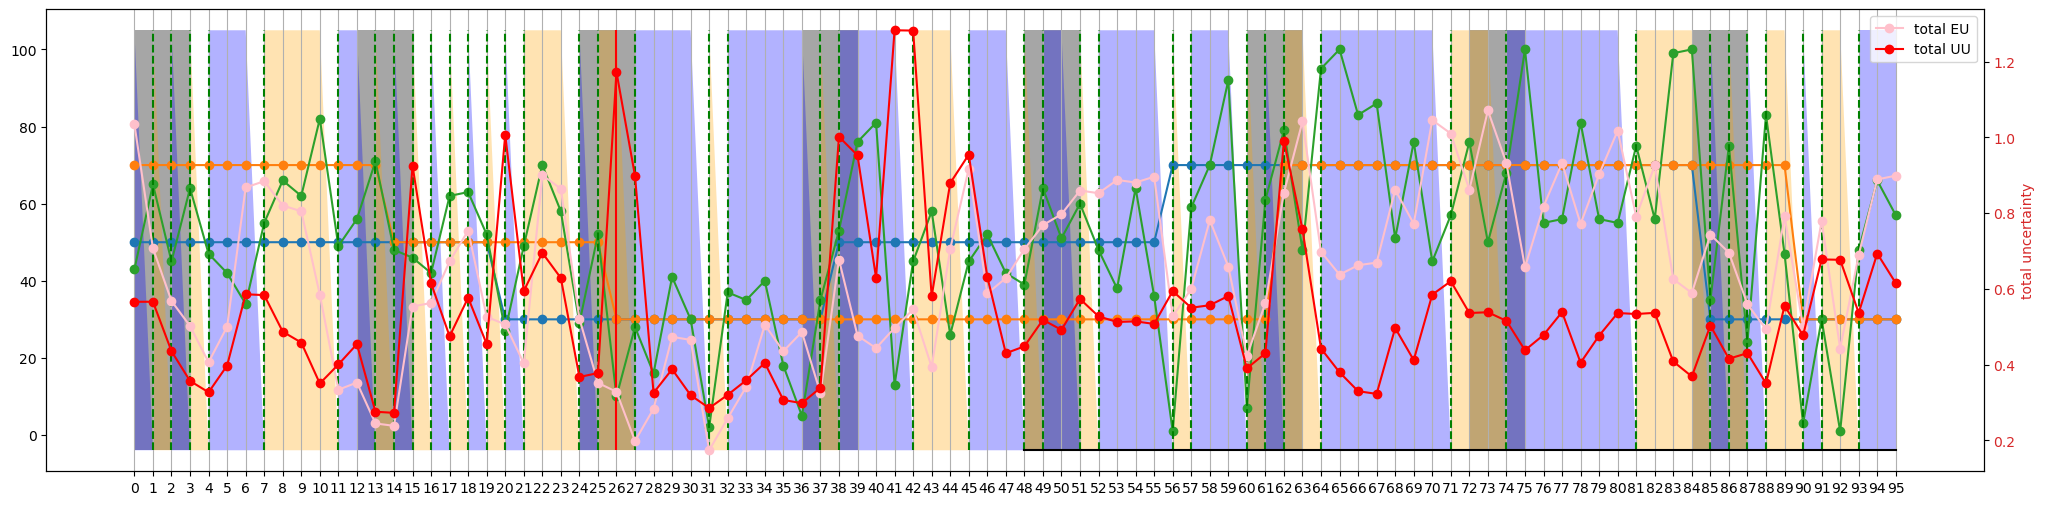

In [164]:
data_session = joint_data_by_session['sub2']['sess6']
gridsize = (1,1)
fig = plt.figure(figsize=(25, 6))
ax = plt.subplot2grid(gridsize, (0, 0))
plt.xticks(data_session['index'])
ax.xaxis.grid() # vertical lines

ax.plot(data_session['index'], data_session['mean_A'], '-o', label='mean_A')
ax.plot(data_session['index'], data_session['mean_B'], '-o', label='mean_B')
ax.plot(data_session['index'], data_session['outcomes'], '-o', label='outcome')

ymin, ymax = ax.get_ylim()
ax.fill_between(data_session['index'],ymin, ymax, where = (data_session['forced']),facecolor='gray',alpha=0.7)

ax.fill_between(data_session['index'],ymin, ymax, where = (data_session['choices_new']==1), interpolate=True,facecolor='orange',alpha=0.3)
ax.fill_between(data_session['index'],ymin, ymax, where = (data_session['choices_new']==0),interpolate=True,facecolor='blue',alpha=0.3)

cps = data_session[data_session['changepoints'] == 1]['index']
ax.vlines(cps, ymin, ymax, color='red', linestyles='solid')

switches = data_session[data_session['switch'] == 1]['index']
ax.vlines(switches, ymin, ymax, color='green', linestyles='dashed')
large_noise = data_session[data_session['SD'] == 20]['index']

ax.plot(large_noise, ymin*np.ones(len(large_noise)), color='black')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('total uncertainty', color=color) 
ax2.tick_params(axis='y', labelcolor=color)

ax2.plot(data_session['index'], data_session['EU_sum_after'], '-o', label='total EU', color='pink')
ax2.plot(data_session['index'], data_session['UU_sum_after'], '-o', label='total UU', color='red')
#ax2.plot(data_session['index'], (data_session['ER_chosen_after']-np.mean(data_session['ER_chosen_after']))/np.std(data_session['ER_chosen_after']), '-o', label='chosen ER')

plt.legend()

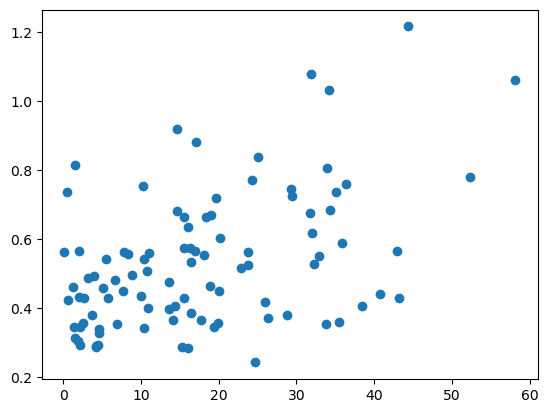

In [153]:
plt.scatter(np.abs(data_session['RPE']), data_session['UU_sum_after'])

/Users/zoehe/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Pearson Correlation Coefficient: 0.4667412348973664, P-value: 1.6401125227082653e-06


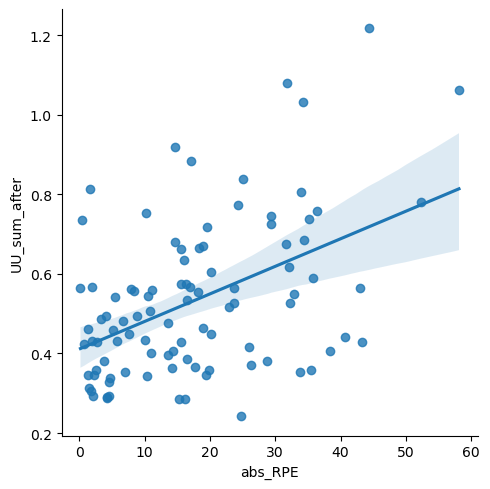

In [157]:
import seaborn as sns
data_temp = pd.DataFrame({'abs_RPE': np.abs(data_session['RPE']), 'UU_sum_after': data_session['UU_sum_after']})
sns.lmplot(x="abs_RPE", y="UU_sum_after", data=data_temp)

correlation, p_value = stats.pearsonr(data_temp['abs_RPE'], data_temp['UU_sum_after'])
print(f"Pearson Correlation Coefficient: {correlation}, P-value: {p_value}")

In [206]:
joint_data_by_sub['sub1']

,level_0,index,trial,rt,pupil_baseline_start,pupil_baseline_outcome,pupil_size_pre_response,pupil_size_avg_pre_response,pupil_size_response,pupil_size_avg_response,...,UU_diff_after,switch,switch_next,outcome_change,trial_after_forced,trial_after_cp,trial_forced,trial_num,RPE_before,sess
0,0,0,0,0.873,"[-0.13285487334831725, -0.15435727323074105, -...","[0.07491006887873684, 0.13786000971694218, 0.1...","[0.11437311041501608, 0.10994014858446984, 0.1...",0.279017,"[0.353667051165722, 0.39952404529320773, 0.433...",0.475576,...,0.000000,False,False,48.0,0,0,1,0,0.000000e+00,1
1,1,1,1,0.503,"[0.14530678606560862, 0.1443430154502174, 0.24...","[0.23190501894722576, 0.17961922205809192, 0.1...","[0.34474857188501473, 0.35575292963603705, 0.3...",0.299246,"[0.3427030080472347, 0.3527936049405821, 0.374...",1.147825,...,0.000000,False,True,22.0,0,0,2,1,-2.000000e+00,1
2,2,2,2,0.948,"[0.22792893919942742, 0.15482785060969537, 0.1...","[0.1730485920638111, 0.15684330963330576, 0.18...","[-0.5578585701312097, -0.5368051541620953, -0....",-0.249000,"[-0.043562563000114525, -0.010950897831385292,...",-0.182329,...,-0.006041,True,False,-20.0,0,0,3,2,2.109510e+01,1
3,3,3,3,0.633,"[-0.04115643605480424, -0.011971396588699315, ...","[-0.02837186777614119, 0.004751287527410095, 0...","[0.9398780279838435, 0.9354819044102489, 0.927...",0.780104,"[0.6531173173194468, 0.6612715975477902, 0.646...",0.399992,...,0.022409,False,False,50.0,0,0,4,3,7.105427e-15,1
4,4,4,4,1.754,"[0.7752312920948785, 0.8033788108457145, 0.831...","[0.467254551806917, 0.46196730826422516, 0.473...","[0.13627293908167493, 0.0938579818830942, 0.08...",-0.051292,"[-0.1988164400882881, -0.1855046140065632, -0....",0.438572,...,-0.011922,False,False,-41.0,1,0,0,4,5.000000e+01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,91,91,91,1.292,"[0.9440574455329321, 0.9797740013763789, 1.000...","[-0.2881632675597719, -0.2400962148296614, -0....","[1.0870597990222244, 1.0612094153744953, 1.048...",1.108661,"[1.1411791340983253, 1.0926622014125866, 1.073...",0.322755,...,-0.018568,True,False,37.0,4,16,0,91,-2.523027e+01,8
764,92,92,92,0.373,"[1.168299084483247, 1.1670923863513962, 1.1944...","[0.9511351459807956, 0.9523740032809924, 0.954...","[1.4614223571061273, 1.5293144197778896, 1.550...",2.093780,"[2.4096743256709146, 2.495328107614667, 2.5140...",1.451788,...,-0.181464,False,False,-7.0,5,17,0,92,8.529054e+00,8
765,93,93,93,0.350,"[0.5128540402488411, 0.5474079431799694, 0.595...","[1.0246539725728203, 1.0375120549738277, 1.049...","[0.6125205116700386, 0.6285798356603844, 0.644...",0.731417,"[0.7648195837852088, 0.7834854352008632, 0.793...",1.193627,...,-0.264893,False,False,3.0,6,18,0,93,-4.468714e+00,8
766,94,94,94,0.354,"[0.06467445175805148, 0.06351523679661694, 0.0...","[-0.6962144444896675, -0.6686769003726343, -0....","[-0.1359992371571531, -0.16171914755336544, -0...",-0.317786,"[-0.3805532585940814, -0.42342857433207653, -0...",-0.712954,...,-0.244399,False,True,8.0,7,19,0,94,-2.574676e-01,8


In [207]:
joint_data_by_sub['sub1'].columns

Index(['level_0', 'index', 'trial', 'rt', 'pupil_baseline_start',
       'pupil_baseline_outcome', 'pupil_size_pre_response',
       'pupil_size_avg_pre_response', 'pupil_size_response',
       'pupil_size_avg_response', 'pupil_size_outcome',
       'pupil_size_avg_outcome', 'pupil_baseline_start_avg',
       'pupil_baseline_outcome_avg', 'pupil_change_pre_response',
       'pupil_change_avg_pre_response', 'pupil_change_response',
       'pupil_change_avg_response', 'pupil_change_outcome',
       'pupil_change_avg_outcome', 'pupil_change_avg_outcome1',
       'pupil_change_avg_outcome2', 'pupil_change_avg_outcome_nassar',
       'pupil_change_avg_outcome3', 'pupil_change_avg_response_nassar',
       'pupil_change_avg_response3', 'rt_next', 'trial', 'choices',
       'choices_new', 'outcomes', 'mean_A', 'mean_B', 'mean_chosen',
       'mean_unchosen', 'forced', 'free', 'valid', 'SD', 'changepoints',
       'trial', 'RPE', 'ER_chosen_before', 'ER_chosen_after',
       'EU_chosen_before',

/Users/zoehe/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Pearson Correlation Coefficient: -0.0705974386782716, P-value: 0.5793457841779237


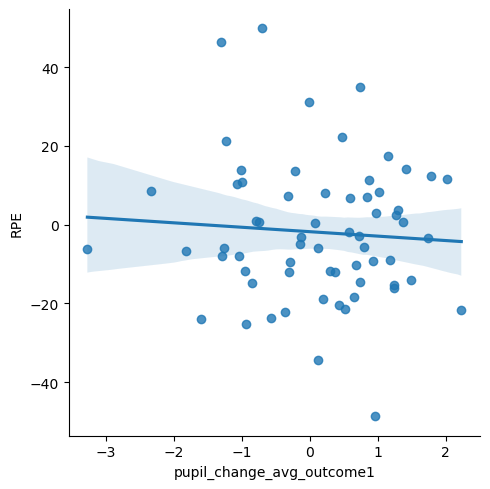

In [210]:
import seaborn as sns
#data_temp = pd.DataFrame({'abs_RPE': np.abs(data_session['RPE']), 'UU_sum_after': data_session['UU_sum_after']})
data_sub = joint_data_by_session['sub1']['sess3']
data_temp = data_sub[(data_sub['free']==True)]
x = "pupil_change_avg_outcome1"
y = "RPE"
sns.lmplot(x=x, y=y, data=data_temp)

correlation, p_value = stats.pearsonr(data_temp[x], data_temp[y])
print(f"Pearson Correlation Coefficient: {correlation}, P-value: {p_value}")

In [232]:
# combine all subjects into one huge dataframe

joint_data_all = pd.DataFrame()
for i in valid_sub:
    joint_data_by_sub[f'sub{i}']['U_RPE'] = joint_data_by_sub[f'sub{i}']['RPE'].abs()
    data_sub = joint_data_by_sub[f'sub{i}']
    data_sub['subject'] = (np.ones(len(data_sub)) * i).astype(int)

    data_sub['EU_diff_after_norm']
    data_sub[]

    joint_data_all = pd.concat([joint_data_all, data_sub], axis=0)

joint_data_all.reset_index(drop=True)


,level_0,index,trial,rt,pupil_baseline_start,pupil_baseline_outcome,pupil_size_pre_response,pupil_size_avg_pre_response,pupil_size_response,pupil_size_avg_response,...,switch_next,outcome_change,trial_after_forced,trial_after_cp,trial_forced,trial_num,RPE_before,sess,U_RPE,subject
0,0,0,0,0.873,"[-0.13285487334831725, -0.15435727323074105, -...","[0.07491006887873684, 0.13786000971694218, 0.1...","[0.11437311041501608, 0.10994014858446984, 0.1...",0.279017,"[0.353667051165722, 0.39952404529320773, 0.433...",0.475576,...,False,48.0,0,0,1,0,0.000000e+00,1,2.000000e+00,1
1,1,1,1,0.503,"[0.14530678606560862, 0.1443430154502174, 0.24...","[0.23190501894722576, 0.17961922205809192, 0.1...","[0.34474857188501473, 0.35575292963603705, 0.3...",0.299246,"[0.3427030080472347, 0.3527936049405821, 0.374...",1.147825,...,True,22.0,0,0,2,1,-2.000000e+00,1,2.109510e+01,1
2,2,2,2,0.948,"[0.22792893919942742, 0.15482785060969537, 0.1...","[0.1730485920638111, 0.15684330963330576, 0.18...","[-0.5578585701312097, -0.5368051541620953, -0....",-0.249000,"[-0.043562563000114525, -0.010950897831385292,...",-0.182329,...,False,-20.0,0,0,3,2,2.109510e+01,1,7.105427e-15,1
3,3,3,3,0.633,"[-0.04115643605480424, -0.011971396588699315, ...","[-0.02837186777614119, 0.004751287527410095, 0...","[0.9398780279838435, 0.9354819044102489, 0.927...",0.780104,"[0.6531173173194468, 0.6612715975477902, 0.646...",0.399992,...,False,50.0,0,0,4,3,7.105427e-15,1,5.000000e+01,1
4,4,4,4,1.754,"[0.7752312920948785, 0.8033788108457145, 0.831...","[0.467254551806917, 0.46196730826422516, 0.473...","[0.13627293908167493, 0.0938579818830942, 0.08...",-0.051292,"[-0.1988164400882881, -0.1855046140065632, -0....",0.438572,...,False,-41.0,1,0,0,4,5.000000e+01,1,7.509671e+00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38970,91,91,91,1.142,"[0.67943674845904, 0.7272363341078137, 0.73705...","[0.5511960490811909, 0.5499120983188762, 0.581...","[1.0707077050777225, 1.0654853260524422, 1.070...",1.213163,"[1.3801842435307121, 1.323949527624748, 1.1854...",0.497171,...,True,14.0,4,29,0,91,-3.201984e+01,8,5.062463e+00,60
38971,92,92,92,0.316,"[-0.17780774209706132, -0.13794868236501812, -...","[-0.8800874249291134, -0.863458312754363, -0.8...","[-0.14873885096615147, -0.11531997069426185, -...",0.221271,"[0.32346568708713375, 0.35393766046567277, 0.4...",0.406316,...,False,17.0,5,30,0,92,-5.062463e+00,8,2.703393e+00,60
38972,93,93,93,0.412,"[-1.203478368664157, -1.1643138433366318, -1.1...","[-3.327919441521653, -3.3458417071503943, -3.3...","[-1.1940200358695918, -1.1961699578124045, -1....",-1.551658,"[-1.7172245184480575, -1.7368905531884036, -1....",-2.623501,...,True,-18.0,6,31,0,93,2.703393e+00,8,1.317194e+01,60
38973,94,94,94,0.319,"[-1.6546526797253853, -1.6049083492062692, -1....","[-0.23448572896024178, -0.11422985799373579, -...","[-1.558495613955596, -1.5328490750914376, -1.4...",-1.222526,"[-1.106845834894351, -1.1308387794174326, -1.1...",-0.842620,...,True,-6.0,7,32,0,94,-1.317194e+01,8,2.102469e+01,60


In [312]:
# linear mixed effect

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler


df_lme = pd.DataFrame({'subject': joint_data_all['subject'],
'sess': joint_data_all['sess'],
'PupilResponse': joint_data_all['pupil_size_avg_outcome'],
'deltaER': joint_data_all['ER_diff_after'], 
'deltaEU': joint_data_all['EU_diff_after'], 
'EUt': joint_data_all['EU_sum_after'], 
'RPE': joint_data_all['RPE'], 
'URPE': joint_data_all['U_RPE'],
'free': joint_data_all['free']})

scaler = StandardScaler()
df_lme[['deltaER', 'deltaEU', 'EUt', 'RPE', 'URPE']] = scaler.fit_transform(df_lme[['deltaER', 'deltaEU', 'EUt', 'RPE', 'URPE']])

df_lme_new = df_lme[df_lme['free'] == True]
# + RPE:deltaEU + URPE:deltaEU + RPE:EUt + URPE:EUt
model = smf.mixedlm("PupilResponse ~ \
    deltaER + EUt + RPE + EUt:RPE + EUt:deltaER + RPE:deltaER", df_lme_new, 
                    groups=df_lme_new["subject"], 
                    re_formula="~deltaER + EUt + RPE+ EUt:RPE + EUt:deltaER + RPE:deltaER")
result = model.fit()
print(result.summary())

/Users/zoehe/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/zoehe/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/zoehe/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


                  Mixed Linear Model Regression Results
Model:                  MixedLM     Dependent Variable:     PupilResponse
No. Observations:       25983       Method:                 REML         
No. Groups:             51          Scale:                  0.5697       
Min. group size:        448         Log-Likelihood:         -29699.1158  
Max. group size:        512         Converged:              Yes          
Mean group size:        509.5                                            
-------------------------------------------------------------------------
                              Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------
Intercept                     -0.185    0.012 -15.641 0.000 -0.208 -0.162
deltaER                       -0.029    0.010  -2.921 0.003 -0.049 -0.010
EUt                           -0.022    0.008  -2.613 0.009 -0.039 -0.006
RPE                            0.046    0.007   6.651 0.

In [307]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np


df_lme_old = pd.DataFrame({'subject': joint_data_all['subject'],
'sess': joint_data_all['sess'],
'PupilResponse': joint_data_all['pupil_change_avg_outcome'],
'deltaER': joint_data_all['ER_diff_after'], 
'deltaEU': joint_data_all['EU_diff_after'], 
'EUt': joint_data_all['EU_sum_after'], 
'RPE': joint_data_all['RPE'], 
'URPE': joint_data_all['U_RPE'],
'free': joint_data_all['free']})

df_lme = df_lme_old[df_lme_old['free'] == True]

# Assuming `df` is your DataFrame and 'PupilResponse' is your target variable
# Independent variables for two different models are 'X1' and 'X2'
X11 = df_lme[['deltaER']]  # Model 1 predictors
X12 = df_lme[['deltaEU']]  # Model 2 predictors
X13 = df_lme[['EUt']]
X14 = df_lme[['RPE']]
#X5 = df_lme[['URPE']]
X21 = df_lme[['deltaER', 'deltaEU']]
X22 = df_lme[['deltaER', 'EUt']]
X23 = df_lme[['deltaER', 'RPE']]
#X9 = df_lme[['deltaER' + 'URPE']]
X24 = df_lme[['deltaEU', 'EUt']]
X25 = df_lme[['deltaEU', 'RPE']]
#X12 = df_lme[['deltaEU' + 'URPE']]
X26 = df_lme[['EUt', 'RPE']]

X31 = df_lme[['deltaER', 'deltaEU', 'EUt']]
X32 = df_lme[['deltaER', 'deltaEU' , 'RPE']]
X33 = df_lme[['deltaER' , 'EUt' , 'RPE']]
X34 = df_lme[['deltaEU' ,'EUt' , 'RPE']]

X41 = df_lme[['deltaER' , 'deltaEU' , 'EUt' , 'RPE']]

y = df_lme['PupilResponse']

X_list = [X11, X12, X13, X14, 
X21, X22, X23, X24, X25, X26,
X31, X32, X33, X34, X41]
# Initialize models

model_list = []
for i in range(len(X_list)):
    model_list.append(LinearRegression())
# Define the k-fold cross validation parameters
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Perform cross-validation
scores_model_list = []
avg_r2_model_list = []
std_r2_model_list = []
for i in range(len(model_list)):
    scores_model = cross_val_score(model_list[i], X_list[i], y, cv=kf, scoring='r2')
    avg_r2_model = np.mean(scores_model)

    scores_model_list.append(scores_model)
    avg_r2_model_list.append(avg_r2_model)
    std_r2_model_list.append(np.std(scores_model))
    print(f"Average R2 for Model {i}: ", avg_r2_model)

Average R2 for Model 0:  -0.00017165550727680224
Average R2 for Model 1:  -0.00019379486530803902
Average R2 for Model 2:  -0.00023280365275311077
Average R2 for Model 3:  -0.00026033019375319987
Average R2 for Model 4:  -0.0002193717539581641
Average R2 for Model 5:  -0.00021276546164306076
Average R2 for Model 6:  -0.0002544948175087436
Average R2 for Model 7:  -0.00025396219046913693
Average R2 for Model 8:  -0.00027872199173901714
Average R2 for Model 9:  -0.00030918213806110375
Average R2 for Model 10:  -0.0002655018757377725
Average R2 for Model 11:  -0.0003021513506536344
Average R2 for Model 12:  -0.0002959392510537784
Average R2 for Model 13:  -0.00033362111592043496
Average R2 for Model 14:  -0.00034898743448952274


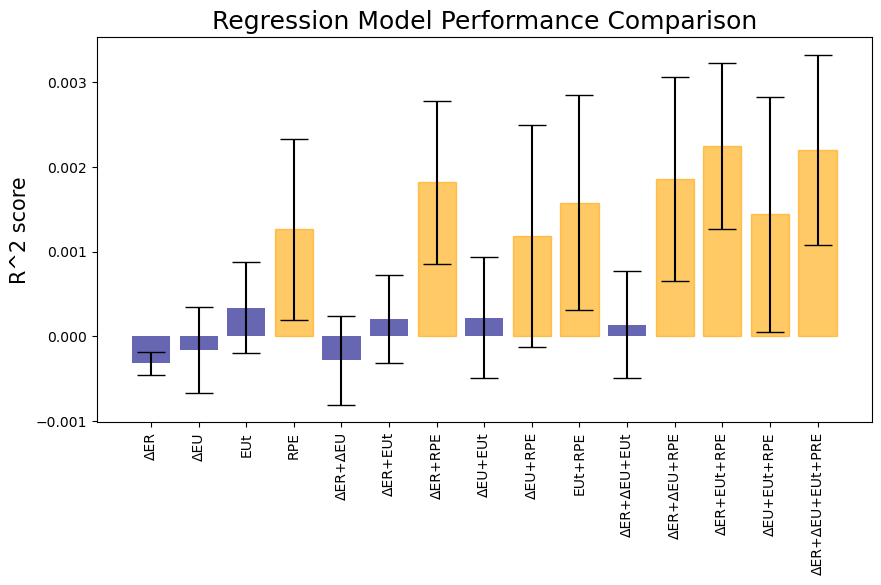

In [292]:
avg_r2_model_list_size = avg_r2_model_list
std_r2_model_list_size = std_r2_model_list

model_names = ['ΔER', 'ΔEU', 'EUt', 'RPE', 'ΔER+ΔEU', 'ΔER+EUt', 'ΔER+RPE', 
'ΔEU+EUt', 'ΔEU+RPE', 'EUt+RPE', 'ΔER+ΔEU+EUt', 'ΔER+ΔEU+RPE', 'ΔER+EUt+RPE', 'ΔEU+EUt+RPE', 
'ΔER+ΔEU+EUt+PRE']

plt.figure(figsize=(10, 5))
bars = plt.bar(np.arange(len(avg_r2_model_list)), avg_r2_model_list, yerr=std_r2_model_list, alpha=0.6, color='navy', capsize=10)
plt.xticks(np.arange(len(avg_r2_model_list)), model_names, rotation='vertical')
#plt.xlabel('model')
plt.ylabel('R^2 score', fontsize=15)
plt.title('Regression Model Performance Comparison', fontsize=18)
bars[3].set_color('orange')
bars[6].set_color('orange')
bars[8].set_color('orange')
bars[9].set_color('orange')
bars[11].set_color('orange')
bars[12].set_color('orange')
bars[13].set_color('orange')
bars[14].set_color('orange')



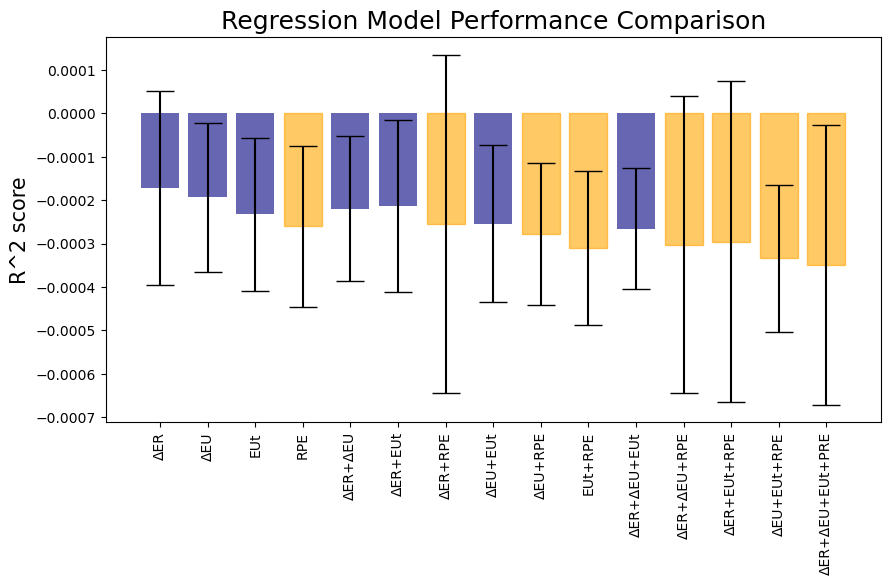

In [308]:
model_names = ['ΔER', 'ΔEU', 'EUt', 'RPE', 'ΔER+ΔEU', 'ΔER+EUt', 'ΔER+RPE', 
'ΔEU+EUt', 'ΔEU+RPE', 'EUt+RPE', 'ΔER+ΔEU+EUt', 'ΔER+ΔEU+RPE', 'ΔER+EUt+RPE', 'ΔEU+EUt+RPE', 
'ΔER+ΔEU+EUt+PRE']

plt.figure(figsize=(10, 5))
bars = plt.bar(np.arange(len(avg_r2_model_list)), avg_r2_model_list, yerr=std_r2_model_list, alpha=0.6, color='navy', capsize=10)
plt.xticks(np.arange(len(avg_r2_model_list)), model_names, rotation='vertical')
#plt.xlabel('model')
plt.ylabel('R^2 score', fontsize=15)
plt.title('Regression Model Performance Comparison', fontsize=18)
bars[3].set_color('orange')
bars[6].set_color('orange')
bars[8].set_color('orange')
bars[9].set_color('orange')
bars[11].set_color('orange')
bars[12].set_color('orange')
bars[13].set_color('orange')
bars[14].set_color('orange')



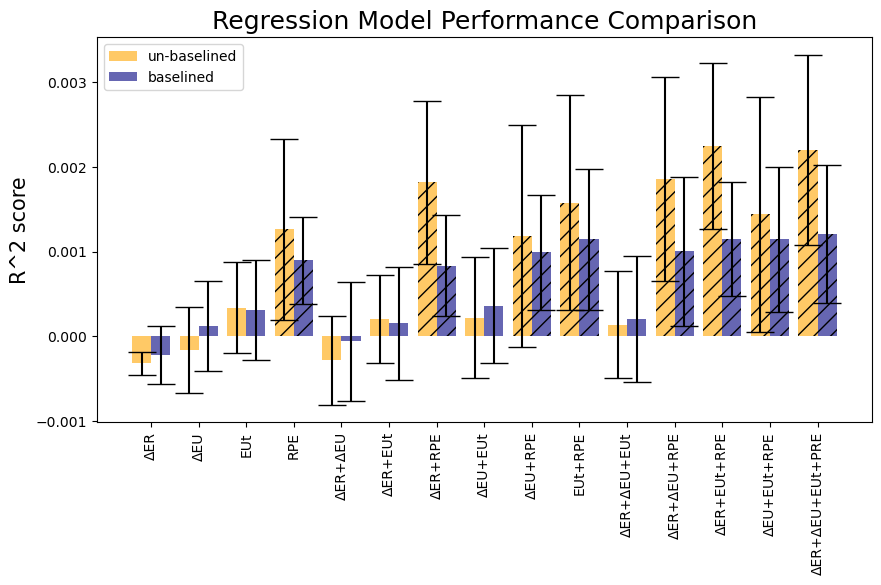

In [306]:
model_names = ['ΔER', 'ΔEU', 'EUt', 'RPE', 'ΔER+ΔEU', 'ΔER+EUt', 'ΔER+RPE', 
'ΔEU+EUt', 'ΔEU+RPE', 'EUt+RPE', 'ΔER+ΔEU+EUt', 'ΔER+ΔEU+RPE', 'ΔER+EUt+RPE', 'ΔEU+EUt+RPE', 
'ΔER+ΔEU+EUt+PRE']

width = 0.4
plt.figure(figsize=(10, 5))
bar1 = plt.bar(np.arange(len(avg_r2_model_list))-width/2, avg_r2_model_list_size, yerr=std_r2_model_list_size, alpha=0.6, color='orange', capsize=10, width = width, label='un-baselined')
bar2 = plt.bar(np.arange(len(avg_r2_model_list))+width/2, avg_r2_model_list, yerr=std_r2_model_list, alpha=0.6, color='navy', capsize=10, width = width, label='baselined')

plt.xticks(np.arange(len(avg_r2_model_list)), model_names, rotation='vertical')
#plt.xlabel('model')
plt.ylabel('R^2 score', fontsize=15)
plt.title('Regression Model Performance Comparison', fontsize=18)
plt.legend()

with_RPE = [3,6,8,9,11,12,13,14]
for i in with_RPE:
    bar1[i].set_hatch('//')
    bar2[i].set_hatch('//')


In [349]:
joint_data_all['choice_next'] = joint_data_all['switch'].astype(float).shift(-1)
# remove: forced trials, last trial (index = 95)
data_temp = joint_data_all[joint_data_all['free'] == True]
data_temp = data_temp[data_temp['index'] != 95]
df_logit = pd.DataFrame({
    'NextChoice': data_temp['choice_next'],
    'RPE': data_temp['RPE'],
    'EUt': data_temp['EU_sum_after'],
    'PupilResponse': data_temp['pupil_change_avg_outcome3']
})


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score


# Model 1: With RPE, PupilResponse, and their interaction
df_logit['RPE_Pupil_Interaction'] = df_logit['RPE'] * df_logit['PupilResponse']
X1 = df_logit[['RPE', 'PupilResponse', 'RPE_Pupil_Interaction']]

# Model 2: With only RPE
X2 = df_logit[['RPE']]

# Target Variable
y = df_logit['NextChoice']

# Logistic Regression Models
model1 = LogisticRegression()
model2 = LogisticRegression()

# Number of folds
k = 5

# StratifiedKFold maintains the percentage of samples for each class
cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Cross-validation scores
scores_model1 = cross_val_score(model1, X1, y, cv=cv, scoring='accuracy')
scores_model2 = cross_val_score(model2, X2, y, cv=cv, scoring='accuracy')

# Average performance across folds
mean_score_model1 = scores_model1.mean()
mean_score_model2 = scores_model2.mean()

# Dummy model cross-validation scores
dummy_model_accuracies = [accuracy_score(y, np.zeros_like(y)) for _ in range(k)]
average_dummy_accuracy = np.mean(dummy_model_accuracies)


print(f"Average CV Accuracy for Model 1: {mean_score_model1}")
print(f"Average CV Accuracy for Model 2: {mean_score_model2}")
print(f"Average Dummy Model Accuracy (Always Predicts 'stay'): {average_dummy_accuracy}")


Average CV Accuracy for Model 1: 0.6949994306096603
Average CV Accuracy for Model 2: 0.6931227735500227
Average Dummy Model Accuracy (Always Predicts 'stay'): 0.6525002932322008


(0.0, 1.01)

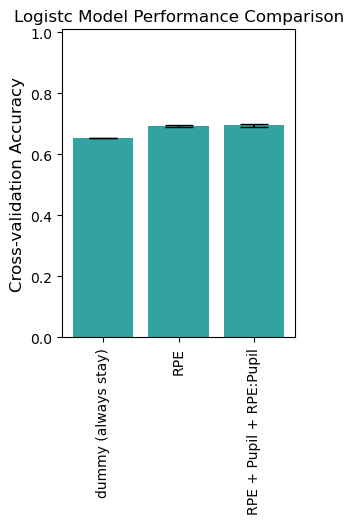

In [361]:

model_names = ['ΔER', 'ΔEU', 'EUt', 'RPE', 'ΔER+ΔEU', 'ΔER+EUt', 'ΔER+RPE', 
'ΔEU+EUt', 'ΔEU+RPE', 'EUt+RPE', 'ΔER+ΔEU+EUt', 'ΔER+ΔEU+RPE', 'ΔER+EUt+RPE', 'ΔEU+EUt+RPE', 
'ΔER+ΔEU+EUt+PRE']

model_names = ['dummy (always stay)', 'RPE', 'RPE + Pupil + RPE:Pupil']
accuracy_mean_list = [average_dummy_accuracy, mean_score_model2, mean_score_model1]
accuracy_std_list = [np.std(dummy_model_accuracies), np.std(scores_model2), np.std(scores_model1)]

plt.figure(figsize=(3, 4))
bars = plt.bar(np.arange(len(accuracy_mean_list)), accuracy_mean_list, yerr=accuracy_std_list, alpha=0.8, color='darkcyan', capsize=10)
plt.xticks(np.arange(len(accuracy_mean_list)), model_names, rotation='vertical')
#plt.xlabel('model')
plt.ylabel('Cross-validation Accuracy', fontsize=12)
plt.title('Logistc Model Performance Comparison', fontsize=12)
plt.ylim([0, 1.01])



In [363]:
stats.ttest_rel(dummy_model_accuracies, scores_model1)

TtestResult(statistic=-17.71013448493661, pvalue=5.971572989279194e-05, df=4)

In [228]:
joint_data_all

,level_0,index,trial,rt,pupil_baseline_start,pupil_baseline_outcome,pupil_size_pre_response,pupil_size_avg_pre_response,pupil_size_response,pupil_size_avg_response,...,switch_next,outcome_change,trial_after_forced,trial_after_cp,trial_forced,trial_num,RPE_before,sess,U_RPE,subject
0,0,0,0,0.873,"[-0.13285487334831725, -0.15435727323074105, -...","[0.07491006887873684, 0.13786000971694218, 0.1...","[0.11437311041501608, 0.10994014858446984, 0.1...",0.279017,"[0.353667051165722, 0.39952404529320773, 0.433...",0.475576,...,False,48.0,0,0,1,0,0.000000e+00,1,2.000000e+00,1
1,1,1,1,0.503,"[0.14530678606560862, 0.1443430154502174, 0.24...","[0.23190501894722576, 0.17961922205809192, 0.1...","[0.34474857188501473, 0.35575292963603705, 0.3...",0.299246,"[0.3427030080472347, 0.3527936049405821, 0.374...",1.147825,...,True,22.0,0,0,2,1,-2.000000e+00,1,2.109510e+01,1
2,2,2,2,0.948,"[0.22792893919942742, 0.15482785060969537, 0.1...","[0.1730485920638111, 0.15684330963330576, 0.18...","[-0.5578585701312097, -0.5368051541620953, -0....",-0.249000,"[-0.043562563000114525, -0.010950897831385292,...",-0.182329,...,False,-20.0,0,0,3,2,2.109510e+01,1,7.105427e-15,1
3,3,3,3,0.633,"[-0.04115643605480424, -0.011971396588699315, ...","[-0.02837186777614119, 0.004751287527410095, 0...","[0.9398780279838435, 0.9354819044102489, 0.927...",0.780104,"[0.6531173173194468, 0.6612715975477902, 0.646...",0.399992,...,False,50.0,0,0,4,3,7.105427e-15,1,5.000000e+01,1
4,4,4,4,1.754,"[0.7752312920948785, 0.8033788108457145, 0.831...","[0.467254551806917, 0.46196730826422516, 0.473...","[0.13627293908167493, 0.0938579818830942, 0.08...",-0.051292,"[-0.1988164400882881, -0.1855046140065632, -0....",0.438572,...,False,-41.0,1,0,0,4,5.000000e+01,1,7.509671e+00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,91,91,91,1.142,"[0.67943674845904, 0.7272363341078137, 0.73705...","[0.5511960490811909, 0.5499120983188762, 0.581...","[1.0707077050777225, 1.0654853260524422, 1.070...",1.213163,"[1.3801842435307121, 1.323949527624748, 1.1854...",0.497171,...,True,14.0,4,29,0,91,-3.201984e+01,8,5.062463e+00,60
764,92,92,92,0.316,"[-0.17780774209706132, -0.13794868236501812, -...","[-0.8800874249291134, -0.863458312754363, -0.8...","[-0.14873885096615147, -0.11531997069426185, -...",0.221271,"[0.32346568708713375, 0.35393766046567277, 0.4...",0.406316,...,False,17.0,5,30,0,92,-5.062463e+00,8,2.703393e+00,60
765,93,93,93,0.412,"[-1.203478368664157, -1.1643138433366318, -1.1...","[-3.327919441521653, -3.3458417071503943, -3.3...","[-1.1940200358695918, -1.1961699578124045, -1....",-1.551658,"[-1.7172245184480575, -1.7368905531884036, -1....",-2.623501,...,True,-18.0,6,31,0,93,2.703393e+00,8,1.317194e+01,60
766,94,94,94,0.319,"[-1.6546526797253853, -1.6049083492062692, -1....","[-0.23448572896024178, -0.11422985799373579, -...","[-1.558495613955596, -1.5328490750914376, -1.4...",-1.222526,"[-1.106845834894351, -1.1308387794174326, -1.1...",-0.842620,...,True,-6.0,7,32,0,94,-1.317194e+01,8,2.102469e+01,60
